# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [18]:
# Get the datasets
!!/usr/bin/curl --output data/test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output data/train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  38677      0 --:--:-- --:--:-- --:--:-- 38687']

In [1]:
# Take a peek at the datasets
!head data/train.dat
!head data/test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0


X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [1]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    return sum(x * y for x, y in zip(array1, array2)) 


def sigmoid(x):
    # Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    # Return the output of the model 
    in_value = dot_product(weights, instance)
    return sigmoid(in_value)

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    model_output = output(weights, instance)
    return 1 if model_output >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Weight initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #Calculate sum(xi * wi)
            in_value = dot_product(weights, instance)
            # Calculate model output using activation function on sum(xi * wi)
            output = sigmoid(in_value)
            # Calculate error
            error = instance[-1] - output
            # Update weight
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [2]:
instances_tr = read_data("data/train.dat")
instances_te = read_data("data/test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### Answer 1
The predict function returns a binary output, 0 or 1. We cannot make any meaningful assertion about how far off our predictions actualy are from the true values. With the continuous value that sigmoid gives us, we can calculate better and more meaningful error, which will help us reach our goal of updating the model weights.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### Answer 2


In [ ]:
instances_tr = read_data("data/train.dat")
instances_te = read_data("data/test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

acc_dict = {}
for lr in lr_array:
  temp = []
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    temp.append(accuracy)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
  print()
  acc_dict[lr] = temp

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4

#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4

#tr: 20, epochs: 100, learning

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
```
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0

#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
```

#### Answer 3



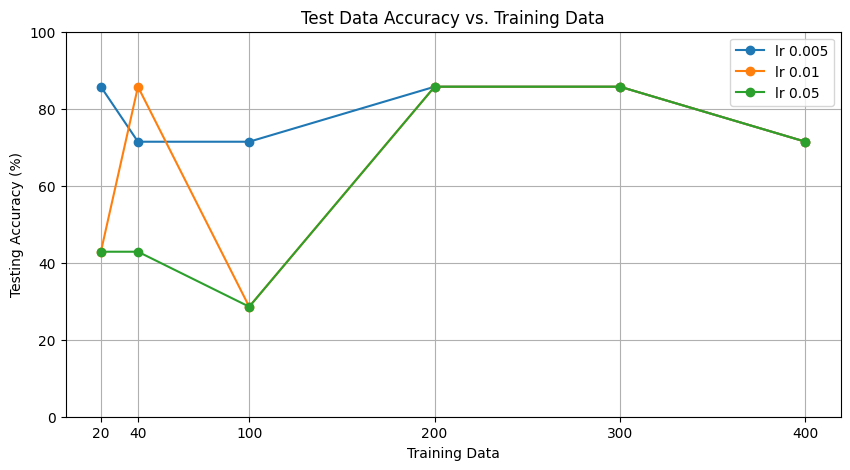

In [6]:
import matplotlib.pyplot as plt
tr = [20, 40, 100, 200, 300, 400]
plt.figure(figsize=(10, 5))
for lr in lr_array:
    plt.plot(tr, acc_dict[lr], marker='o', label=f'lr {lr}')
plt.title('Test Data Accuracy vs. Training Data')
plt.xlabel('Training Data')
plt.ylabel('Testing Accuracy (%)')
plt.xticks(tr)
plt.grid(True)
plt.ylim(0, 100)
plt.legend()
plt.show()


#### Answer A
The results suggest that it is not necessary to train with the entire training dataset to achieve high accuracy on the test dataset. For instance, with a training size of 20, using a learning rate of 0.005, the model achieved an accuracy of 85.7%. This indicates that even with a smaller training data, the model can fit unseen data pretty well. However, this trend is not consistent across all combination, as seen from the above graph.

#### Answer B 
In the provided results, the second run with 100 training data, 20 epochs and learning rate 0.050 got an accuracy of 71.0%, while the first run with 200 data, 20 epochs and learning rate 0.005 got 68.0% accuracy. This discrepancy can be due to several factors such as - overfitting, learning rate, or the noise in the data that may affect how  the AI model learns from the data. From here, we can see that simply increasing the amount of training data may not always give better performance if the model is not well-tuned.

#### Answer C
In my training loop, I have achieved higher accuracy than 80.0% for some specific cases. The best accuracy I observed is 85.7% with 20 training data, 100 epochs and learning rate 0.005. This suggests that with careful tuning of existing hyperparameters, higher accuracy can be achieved.

#### Answer D
Training with more epochs is not always helpful, as seen in some of the results where increased epochs did not lead to significant improvements in accuracy. For example, running 100 epochs with a lower learning rate may not be effective if the model has already converged to an optimal solution earlier. There is a risk of overfitting when training for too many epochs, particularly if the model learns the noise in the training data.
